<a href="https://colab.research.google.com/github/TusharPandey14/PRICE_PREDICTION/blob/main/Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


Data Collection And Processing

In [ ]:
#loading the data to the pandas
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [ ]:
#print first 5 rows in the data set
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
#print last 5 rows in the data set
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
#no of rows and colomns 
gold_data.shape

(2290, 6)

In [ ]:
# getting info of our data 
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#checking the no of missing values ; in case of missing values we use the mean of data in there place
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
#getting statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation :

1: Positive Correlation 

2: Negative Correlation

In [ ]:
correlation=gold_data.corr()

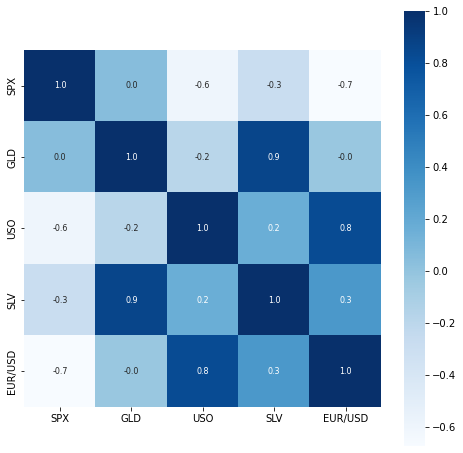

In [ ]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [ ]:
# correlation values of gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


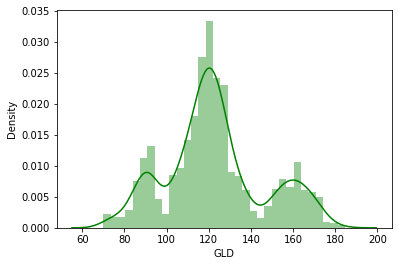

In [ ]:
#checking the distribution of the gold price
sns.distplot(gold_data['GLD'],color='green')

Splitting the features and the target


In [ ]:
x=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']

In [ ]:
print(x)  

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting the data into Training data and test data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

Model Trainig : random forest Regressor 

In [ ]:
regressor=RandomForestRegressor(n_estimators=100)

In [ ]:
#Training the Regressor
regressor.fit(x_train,y_train)

RandomForestRegressor()

Model Regressor


In [ ]:
#Prediction on test data
test_data_prediction=regressor.predict(x_test )

In [ ]:
#predicted values of GOLD
print(test_data_prediction)

[168.59449908  81.75840004 115.83910056 127.50860049 120.53120174
 154.73909755 150.18869805 125.99150048 117.51659874 126.02620078
 116.47400101 172.04320069 141.05409752 167.7203981  115.15080023
 117.58020061 138.51460266 170.18550081 159.39370166 157.06759935
 155.21880059 125.10880053 175.89959893 157.42180345 125.22220046
  93.62119936  77.70479985 120.44830016 119.09139913 167.52840031
  88.22030042 125.3528999   91.14880095 117.66490031 121.09079934
 136.38080103 115.55040127 114.87940067 148.29000032 106.91200075
 104.41980227  87.33559802 126.50810036 118.00140012 152.85219942
 119.72989987 108.44049988 108.05349846  93.21850082 127.0789981
  74.71350049 113.57499908 121.27609993 111.29359917 118.82179896
 120.69299997 159.42210061 168.37050079 146.97229672  85.6447984
  94.18840037  86.90349893  90.47310031 119.12100076 126.52720083
 127.53830015 168.58069941 122.23559934 117.54969904  98.90100067
 168.34050116 142.70329766 132.13170235 121.24470206 120.93039966
 119.6596004

In [ ]:
# R squared error
error_score=metrics.r2_score(y_test,test_data_prediction)
print("R square error : ",error_score)

R square error :  0.9891580626917875


Compare the actual values and predicted Values


In [ ]:
#converting y_test into list to prevent error
y_test=list(y_test)

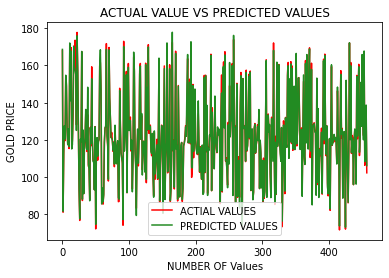

In [ ]:
#plotting 
plt.plot(y_test,color='red',label='ACTIAL VALUES')
plt.plot(test_data_prediction,color='forestgreen',label='PREDICTED VALUES')
plt.title('ACTUAL VALUE VS PREDICTED VALUES')
plt.xlabel('NUMBER OF Values')
plt.ylabel('GOLD PRICE')
plt.legend()
plt.show()
